#### 2-dimentional animation of fields

This code produce an animation of one component in fdtd-solver as a heatmap.

All data is placed in "2D_anim._values.txt" had been created after run of 2Dimention_solution_TEz.cpp. So, first cell is properly parse whole data, second one is just showing it,frame (at time) by frame.

I added the appropriate colorbar, you can read the explanation at this link: https://joseph-long.com/writing/colorbars/, I also added saving option. Now, if you want to save it as a .gif file just delete '#' symol in corresponding line.

In [7]:
#########/ data initializing /#################################################
Field = []
with open("Ex.txt", 'r') as f:
    TIME_dt_DTS = f.readline().split(' ')
    TIME = (int)(TIME_dt_DTS[0])
    dt = (float)(TIME_dt_DTS[1])
    DTS = (int)(TIME_dt_DTS[2])
    SIZE = (int)(f.readline())
    for t in range(int(TIME/DTS)):
        temp = f.readline() 
        temp = temp.split(' ')[:-1]
        Field.append(list(map(float, temp)))

<IPython.core.display.Javascript object>


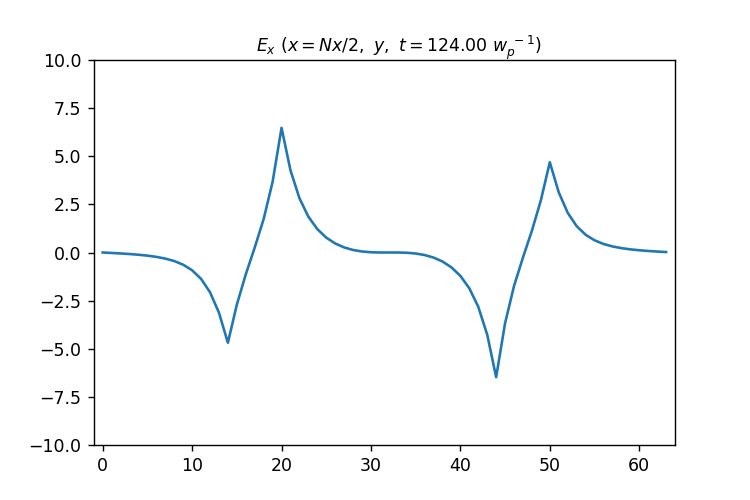

In [13]:
######### / animation /########################################################
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib notebook


fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, xlim=(-1, SIZE), ylim=(-10, 10))

Field_, = ax.plot(range(SIZE), Field[0])
time_ = ax.text(0.28, 1.02, '', transform=ax.transAxes)

def redraw(i):
    global dt
    Field_.set_data(range(SIZE), Field[i])
    time_.set_text('$E_x\ (x=Nx/2,\ y,\ t=%.2f\ w_p^{\ -1}$)' %(DTS*i*dt))
    return Field_, time_


anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=int(TIME/DTS),
                               interval=50,
                               blit=True,
                               )

anim.save("Ex(0.5'SX, y, t).mp4", writer="imagemagick", fps = 30)

plt.show()